1. Данные о продажах видеоигр в разных регионах. Представлена информация продаж Америки, Европы, Японии, остальных и общемировая. Датасет взят с сайта www.kaggle.com, вот ссылка на сам датасет: https://www.kaggle.com/datasets/gregorut/videogamesales/data Данные реальны.
2. Представлены как числовые, так и строковый типы .
 - Rank - топ по продажам - числовой
 - Name - наименование видеоигры - строковый
 - Platform - платформа, на которой игра выпускалась - строковый
 - Year - год выхода - числовой Genre - жанр - строковый
 - Publisher - издатель - строковый
 - NA_Sales - продажи в Америке (в миллионах) - числовой
 - EU_Sales - продажи в Европе (в миллионах) - числовой
 - JP_Sales - продажи в Японии (в миллионах) - числовой
 - Other_Sales - продажи в остальных частях всета (в миллионах) - числовой
 - Global_Sales - Общемировые продажи. - числовой

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv('vgsales.csv')
df


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Добавим новый атрибут "Возраст игры"

In [5]:
df['Age of the game'] = 2016 - df['Year']
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Age of the game
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,10.0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,31.0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,8.0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,7.0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,20.0


Проверяем на пустые ячейки

In [7]:
df.isna().sum()

Rank                 0
Name                 0
Platform             0
Year               271
Genre                0
Publisher           58
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Age of the game    271
dtype: int64

Проверяем дубликаты

In [173]:
df.duplicated().sum()

0

Заменим пустые ячейки издателей на просто "Другой"

In [9]:
df['Publisher'].fillna('Other', inplace = True)

C:\Users\Adik\AppData\Local\Temp\ipykernel_14692\138722896.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Publisher'].fillna('Other', inplace = True)


Удалим пустые значения

In [11]:
df = df[df['Year'].notna()]
df.isna().sum()

Rank               0
Name               0
Platform           0
Year               0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Age of the game    0
dtype: int64

Найдём выбросы

In [13]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Age of the game
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,10.0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,31.0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,8.0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,7.0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,14.0
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,13.0
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,8.0
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,6.0


<Axes: >

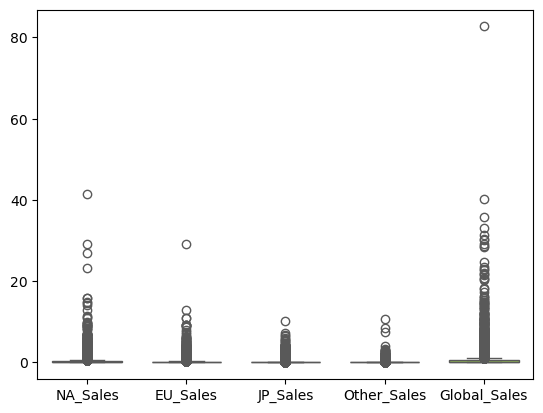

In [17]:
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
sns.boxplot(data = df[sales_columns], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)

Удалим выбросы

<Axes: >

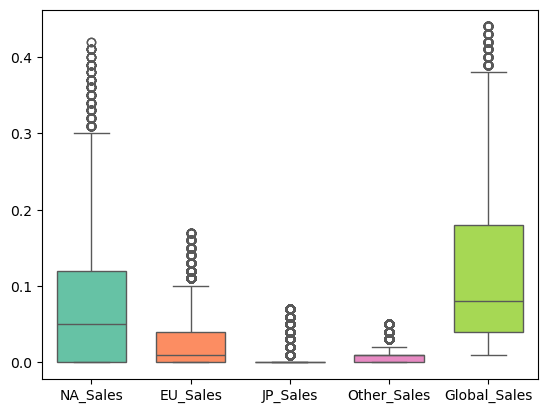

In [19]:
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    q1 = df[sales_columns[i]].quantile(0.25)
    q2 = df[sales_columns[i]].quantile(0.75)
    qr = q2 - q1
    lowBorder = q1 - 1.5 * qr
    upBorder = q2 + 1.5 * qr
    df = df[(df[sales_columns[i]] >= lowBorder) & (df[sales_columns[i]] <= upBorder)]

sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
sns.boxplot(data = df[sales_columns], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)

In [21]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Age of the game
4414,4416,NBA Live 2000,N64,1999.0,Sports,Electronic Arts,0.42,0.02,0.0,0.00,0.44,17.0
4418,4420,TouchMaster 3,DS,2009.0,Puzzle,Warner Bros. Interactive Entertainment,0.30,0.11,0.0,0.04,0.44,7.0
4422,4424,X-Men Legends II: Rise of Apocalypse,XB,2005.0,Role-Playing,Activision,0.30,0.12,0.0,0.02,0.44,11.0
4423,4425,Food Network: Cook or Be Cooked,Wii,2009.0,Misc,Namco Bandai Games,0.41,0.00,0.0,0.03,0.44,7.0
4424,4426,Transformers: Fall of Cybertron,X360,2012.0,Action,Activision,0.28,0.13,0.0,0.04,0.44,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.00,0.01,14.0
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.00,0.01,13.0
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.00,0.01,8.0
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.00,0.01,6.0


Рассмотрим разные распределения и выберем наиболее подходящий критерий для выявления зависимостей

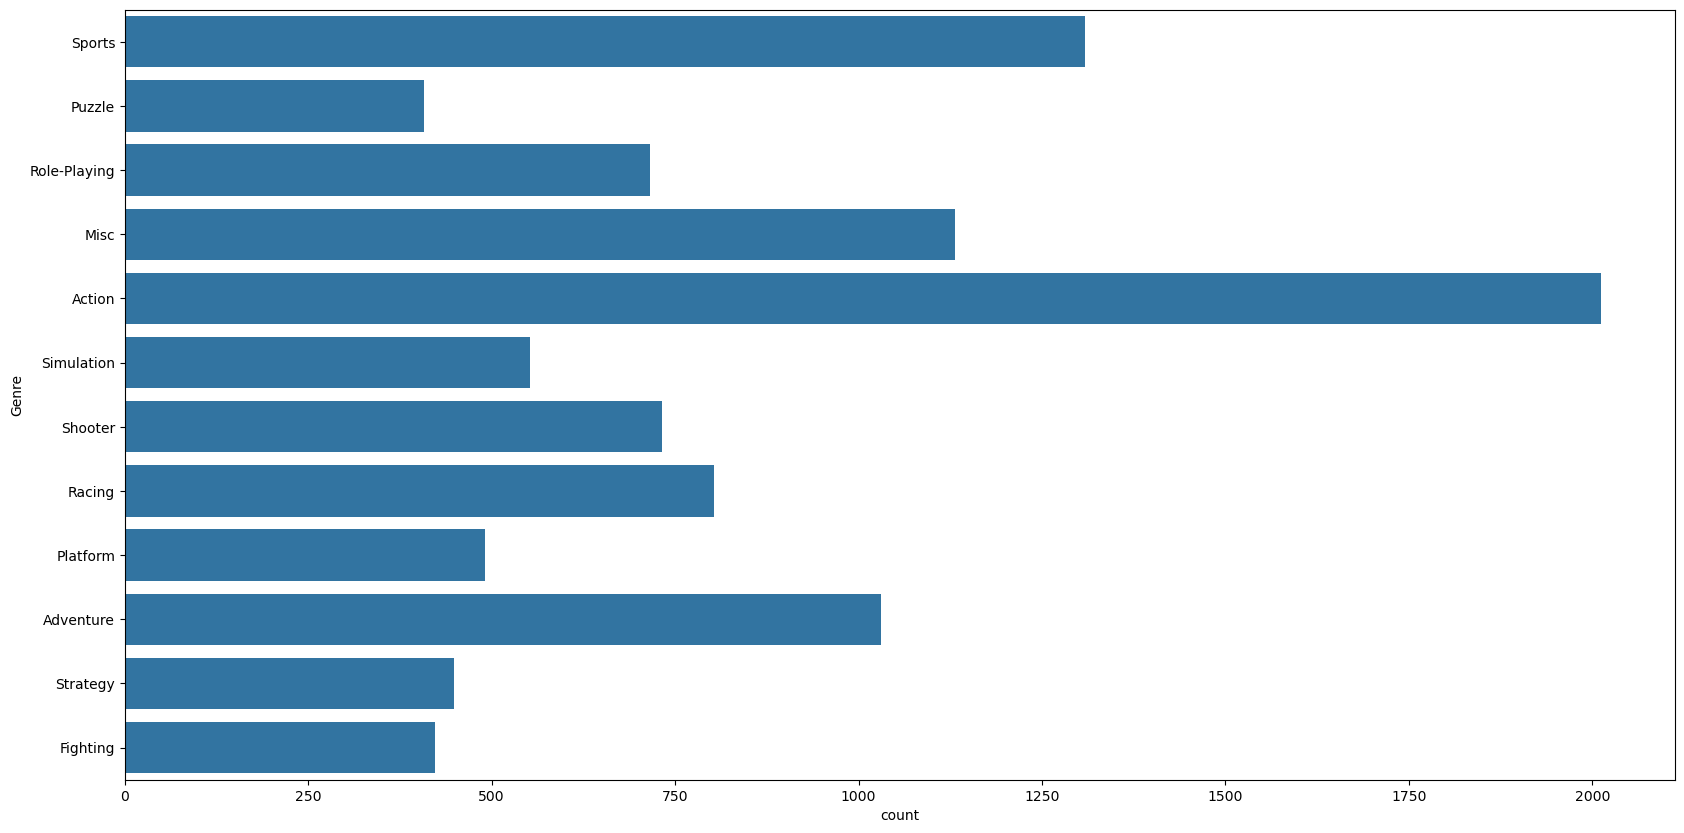

In [23]:
plt.figure(1 , figsize = (20 , 10))
sns.countplot(y = 'Genre' , data = df)
plt.show()

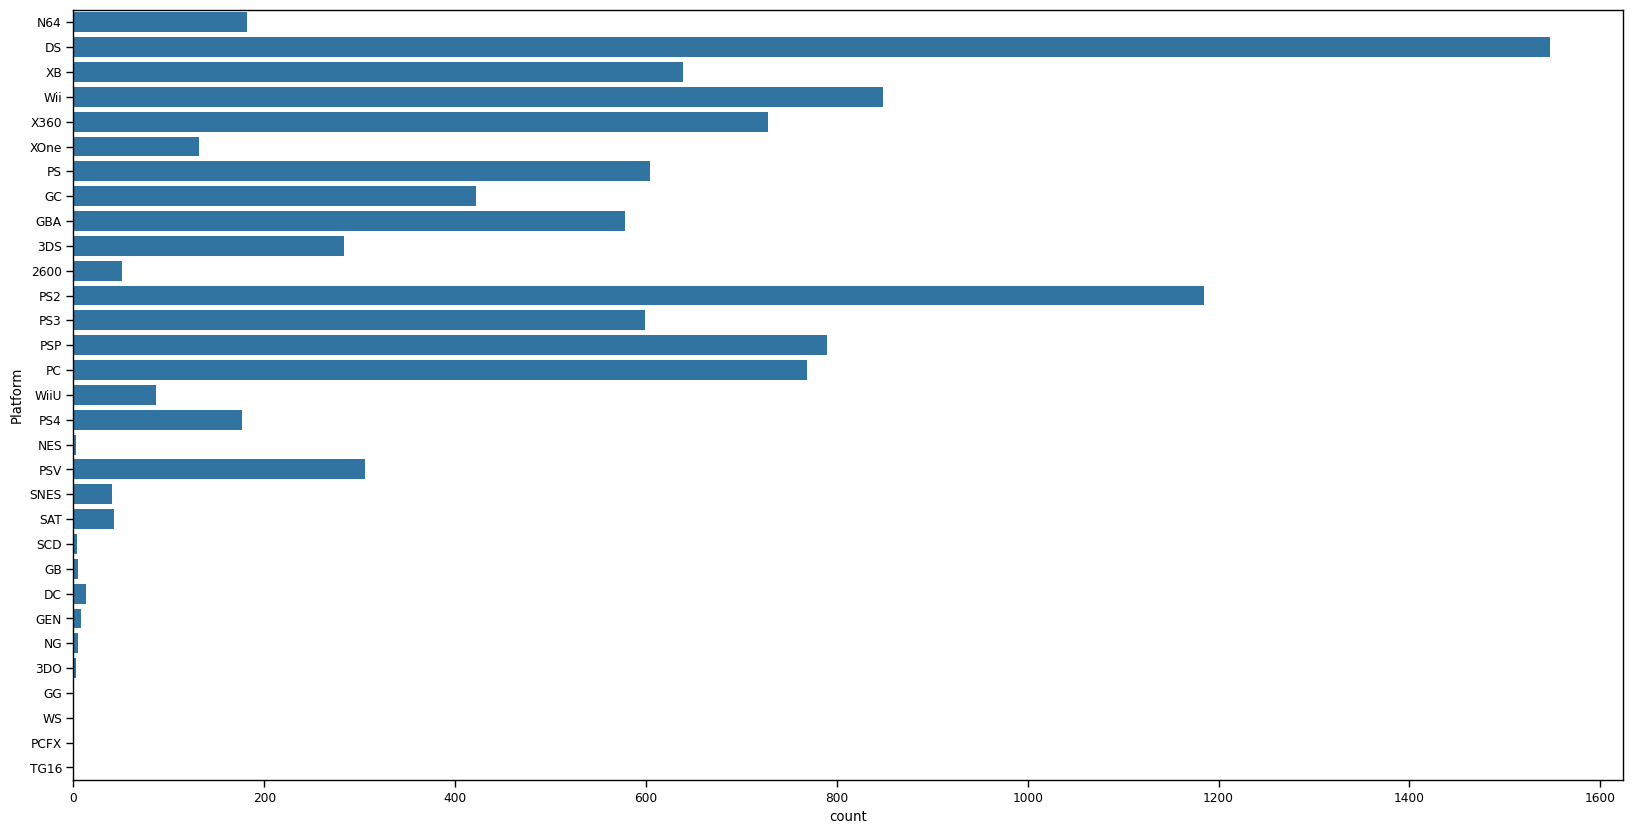

In [35]:
plt.figure(1 , figsize = (20 , 10))
sns.countplot(y = 'Platform' , data = df)
plt.show()

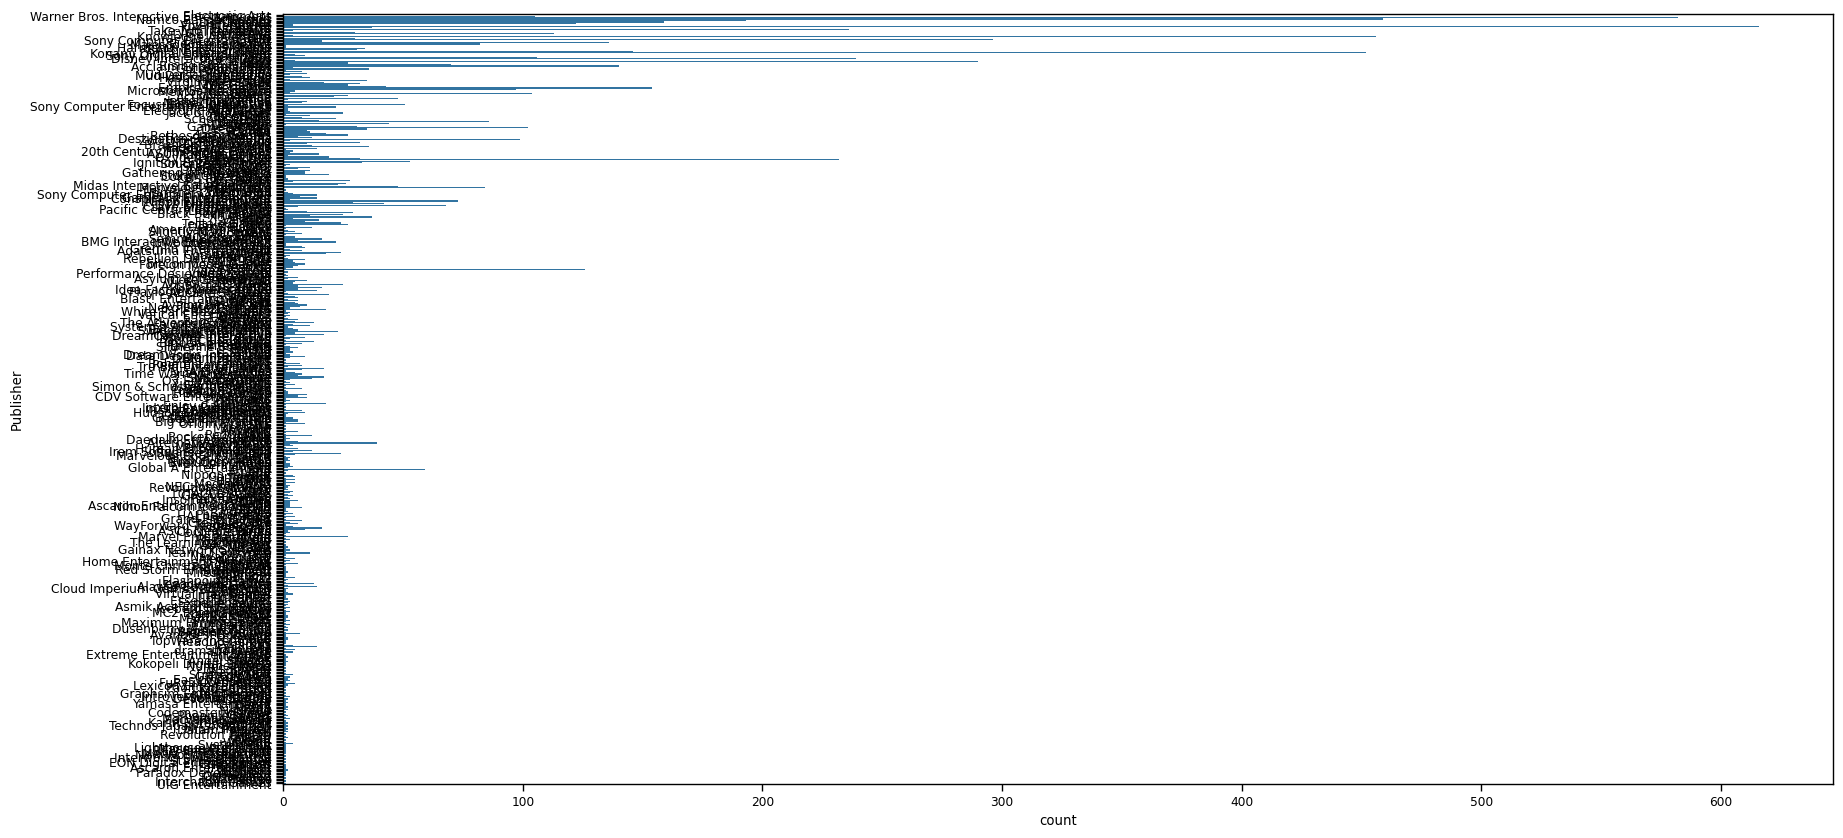

In [37]:
plt.figure(1 , figsize = (20 , 10))
sns.countplot(y = 'Publisher' , data = df)
plt.show()

Издателей слишком много. Платформы и жанры отлично подходят для дальнейшей работы. Среди платформ есть несколько малочисленных представителей, поэтому для большей наглядности выберем жанры как критерий для выявления зависимостей.

Посмотрим корреляцию между атрибутами

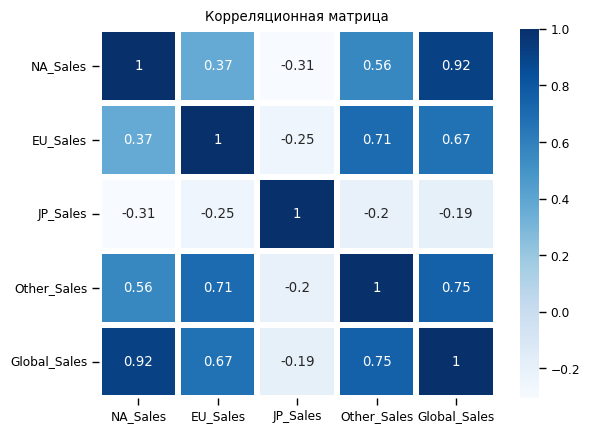

In [25]:
dfNum = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
sns.set_context('paper')
sns.heatmap(dfNum.corr(), cmap = "Blues", annot = True, linewidth=3)
plt.title("Корреляционная матрица")
plt.show()

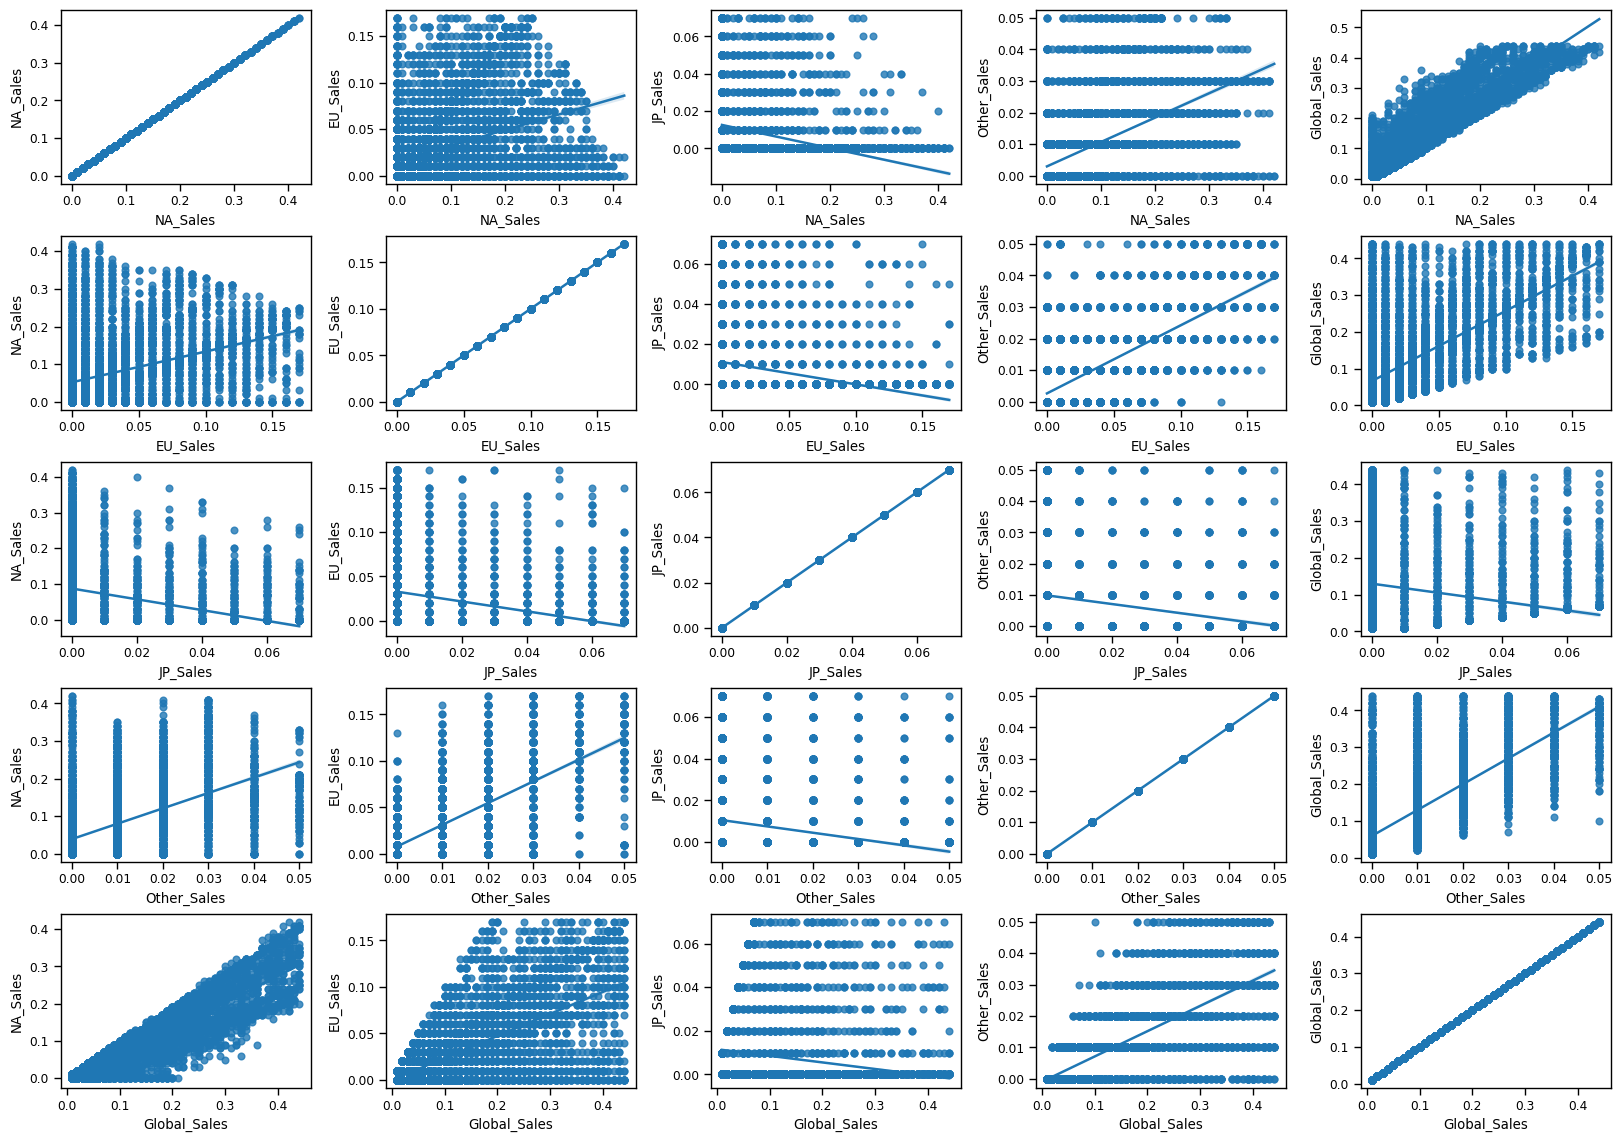

In [27]:
plt.figure(1 , figsize = (20, 14))
n = 0 
for x in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']:
    for y in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']:
        n += 1
        plt.subplot(5 , 5 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

Построим графики зависимости одной переменной от другой

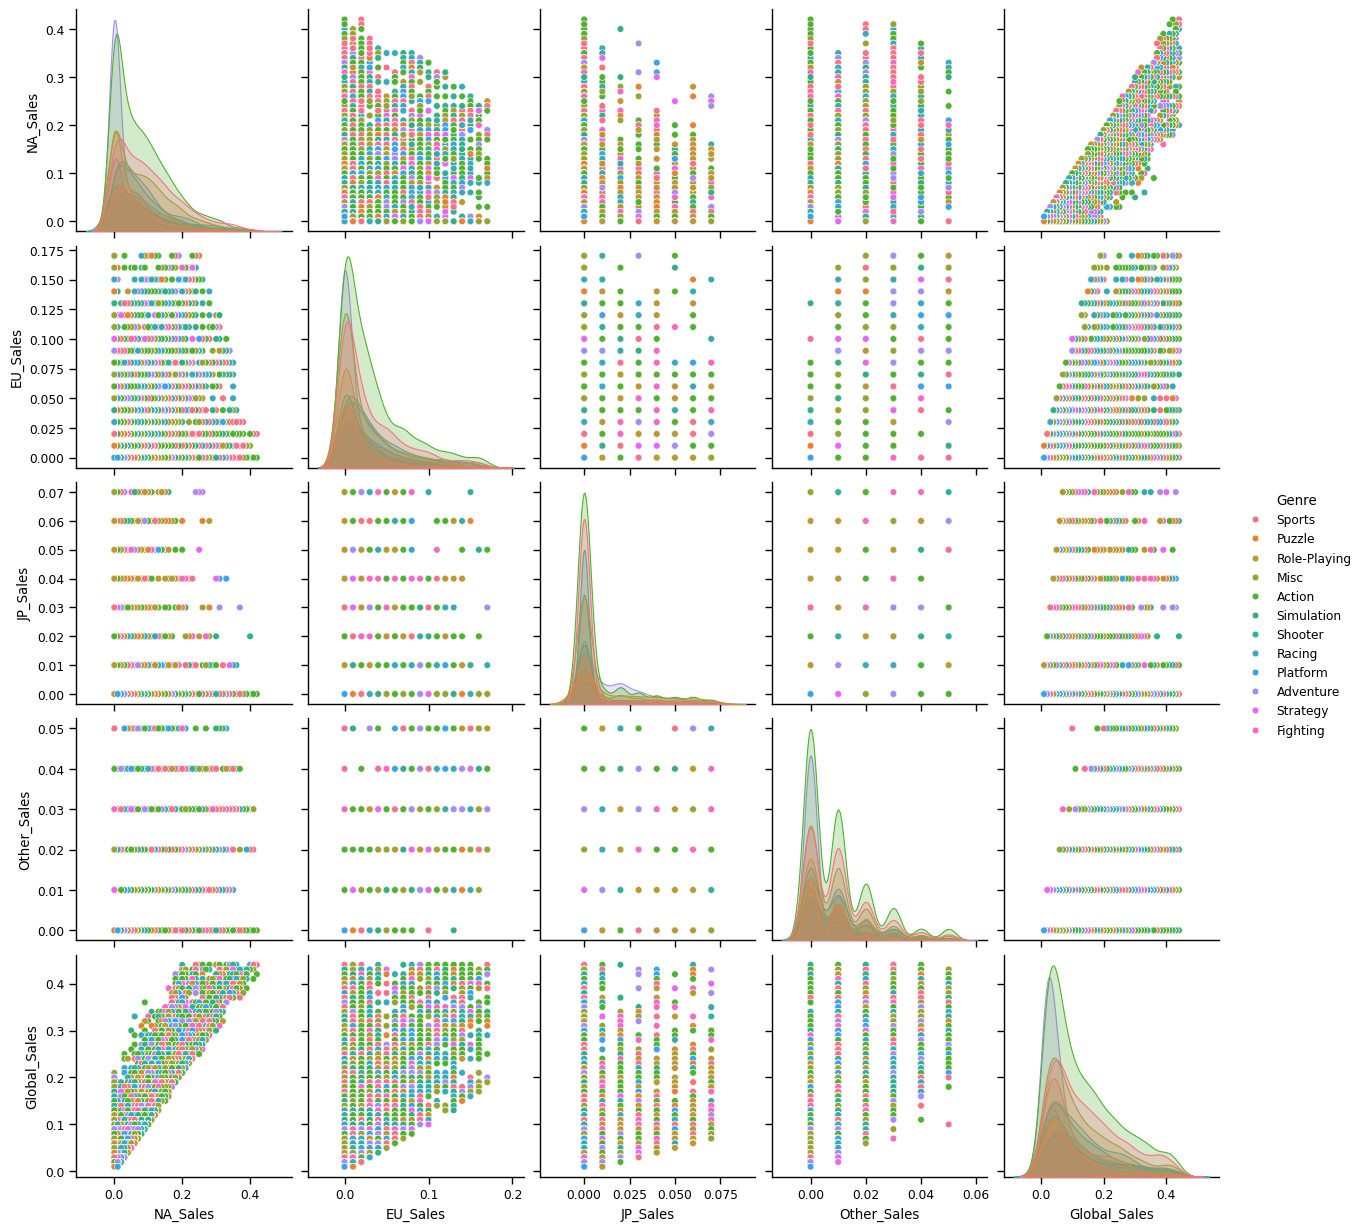

In [29]:
df_pair = df.loc[:,["Platform", "Genre", 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
sns.pairplot(df_pair, hue='Genre')

Нормализуем данные для дальнейшей кластеризации

In [31]:
scaler = StandardScaler()
df_st = scaler.fit_transform(dfNum)
df_st = pd.DataFrame(df_st)
df_st.columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
df_st

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,4.158603,-0.221740,-0.471071,-0.766878,3.000484
1,2.712245,2.173148,-0.471071,2.738553,3.000484
2,2.712245,2.439247,-0.471071,0.985837,3.000484
3,4.038074,-0.753937,-0.471071,1.862195,3.000484
4,2.471186,2.705345,-0.471071,2.738553,3.000484
...,...,...,...,...,...
10049,-0.783120,-0.753937,-0.471071,-0.766878,-1.036913
10050,-0.783120,-0.753937,-0.471071,-0.766878,-1.036913
10051,-0.903650,-0.753937,-0.471071,-0.766878,-1.036913
10052,-0.903650,-0.487839,-0.471071,-0.766878,-1.036913


Кластризируем методом k means и определим количество кластеров с помощью метода локтя. Будут построены только самые наглядные графики

C:\Users\Adik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1418: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


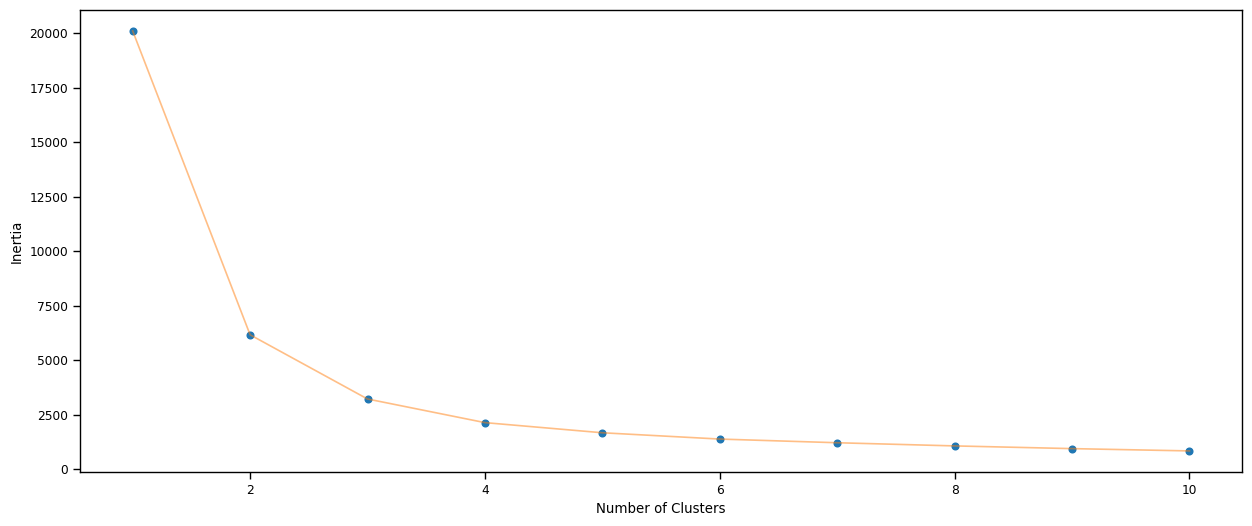

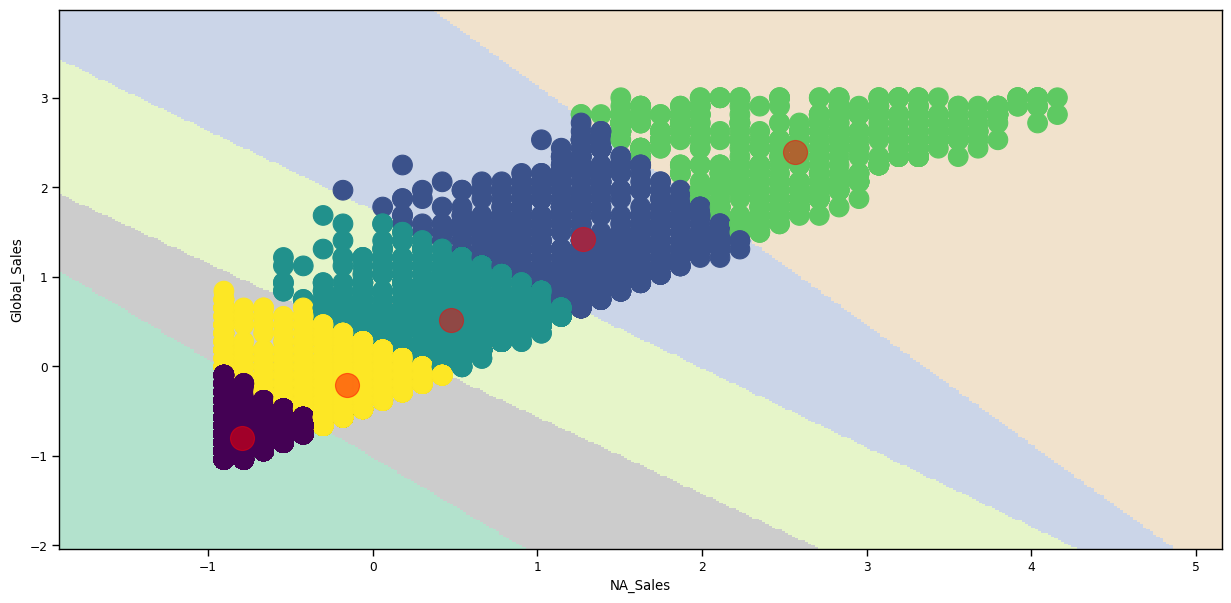

C:\Users\Adik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1418: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


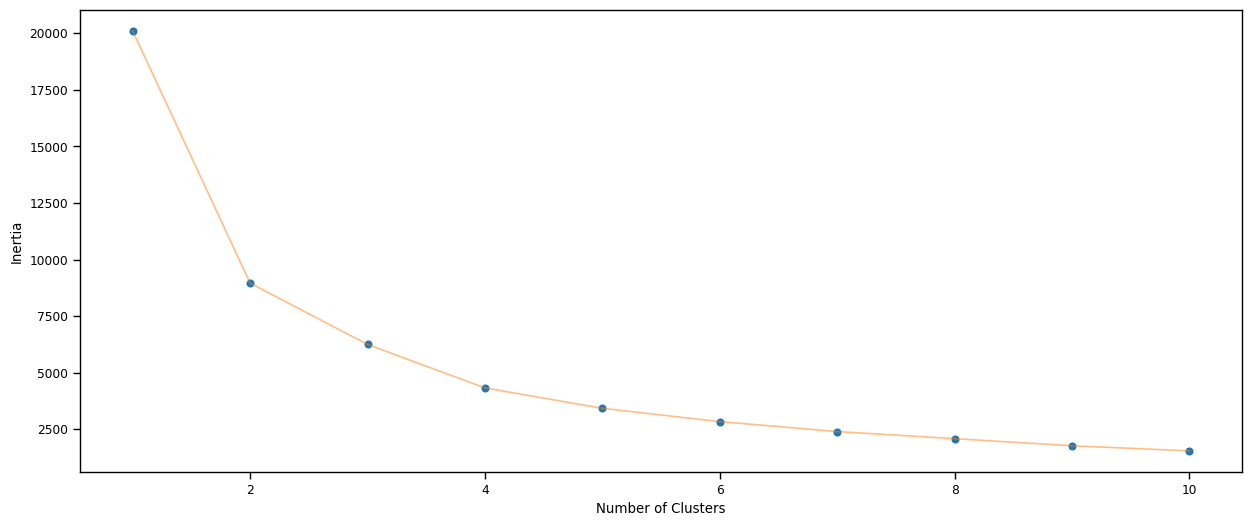

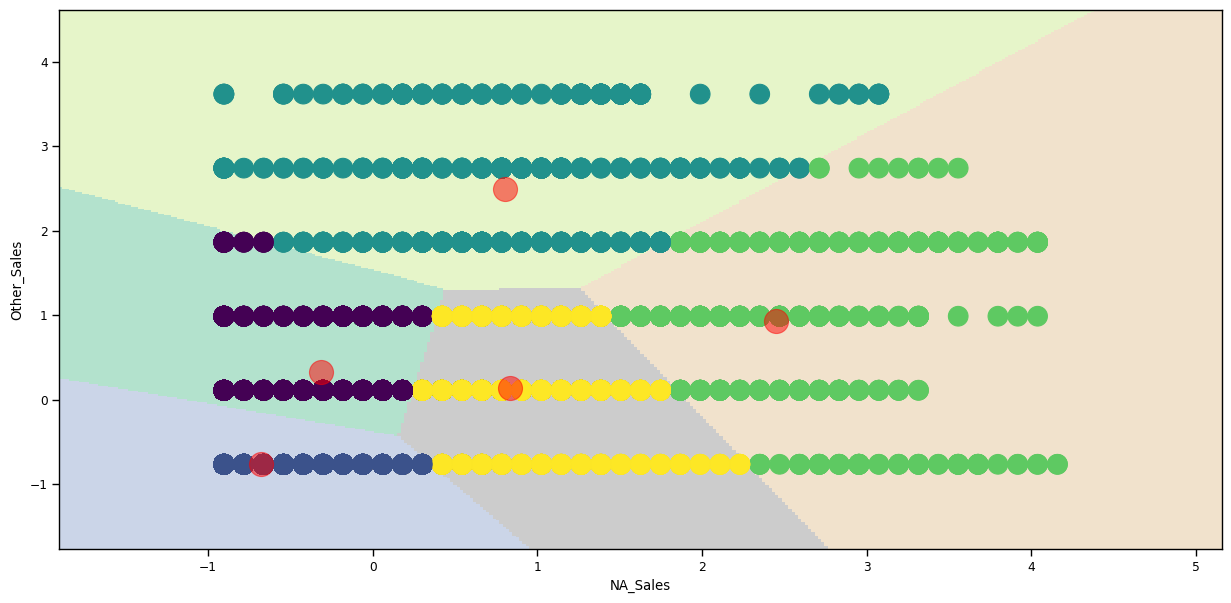

C:\Users\Adik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1418: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


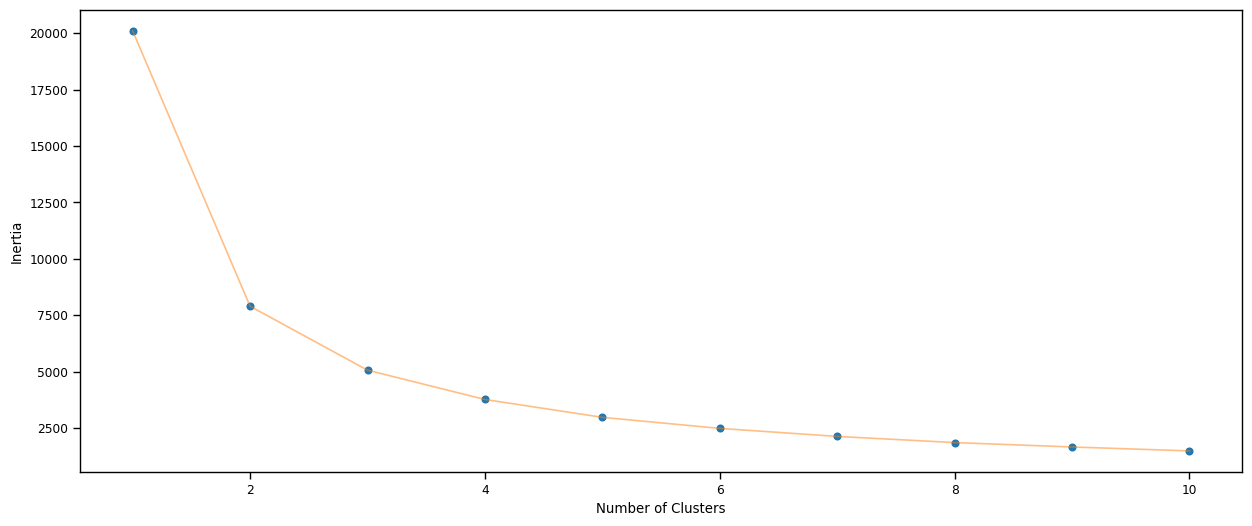

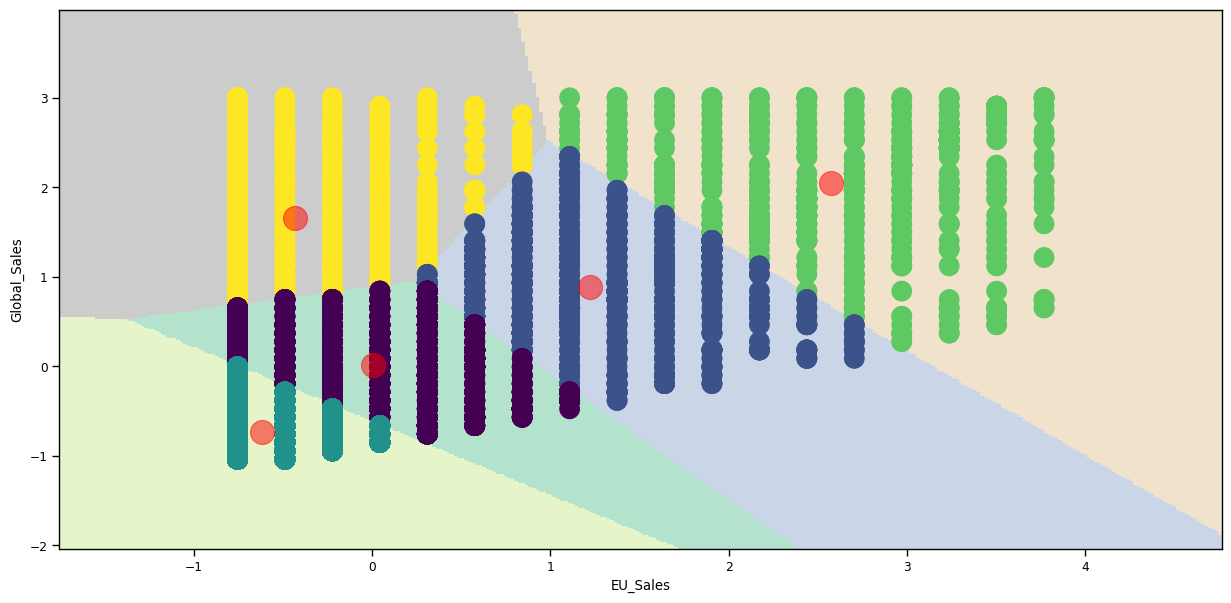

C:\Users\Adik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1418: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


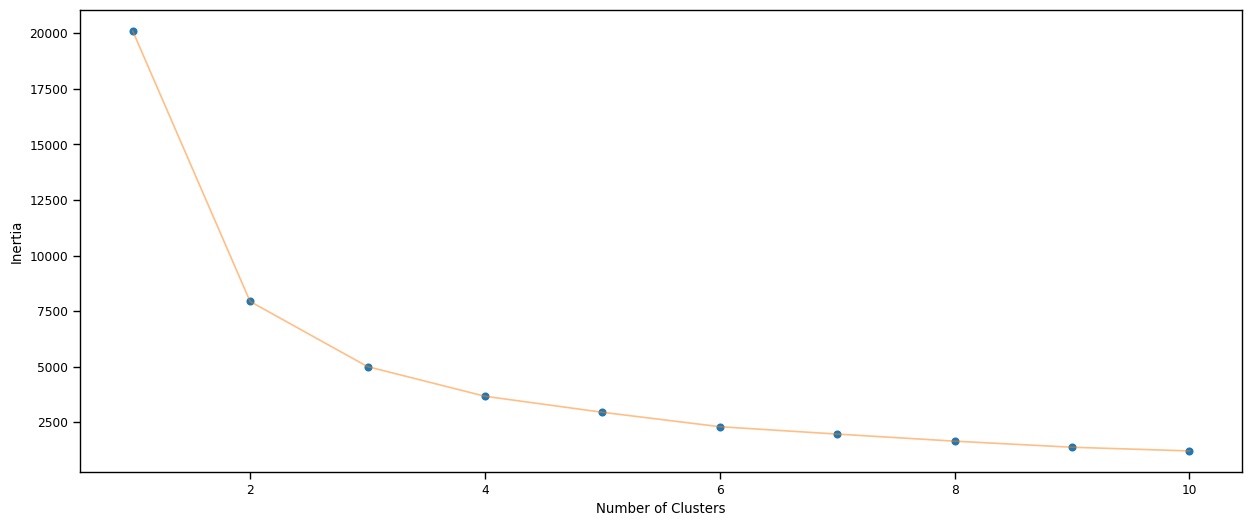

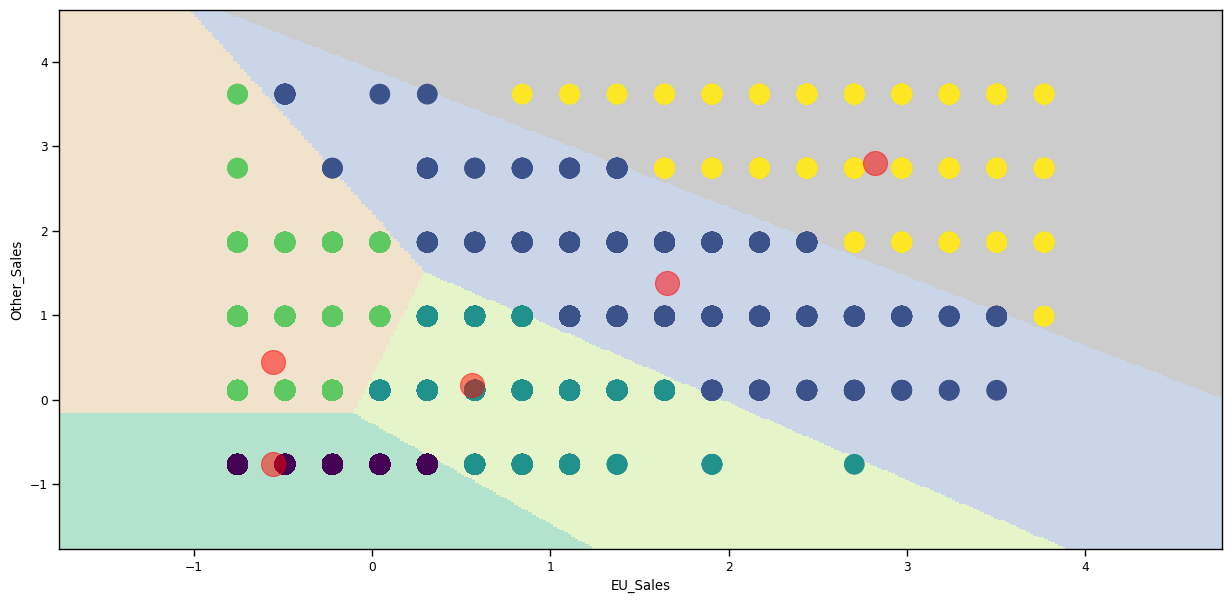

C:\Users\Adik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1418: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


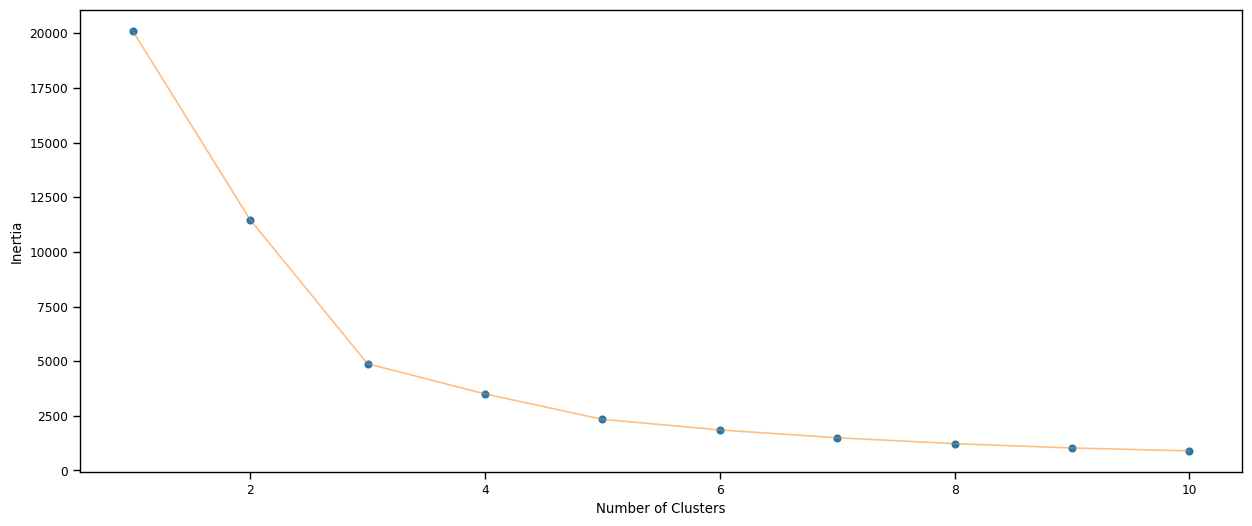

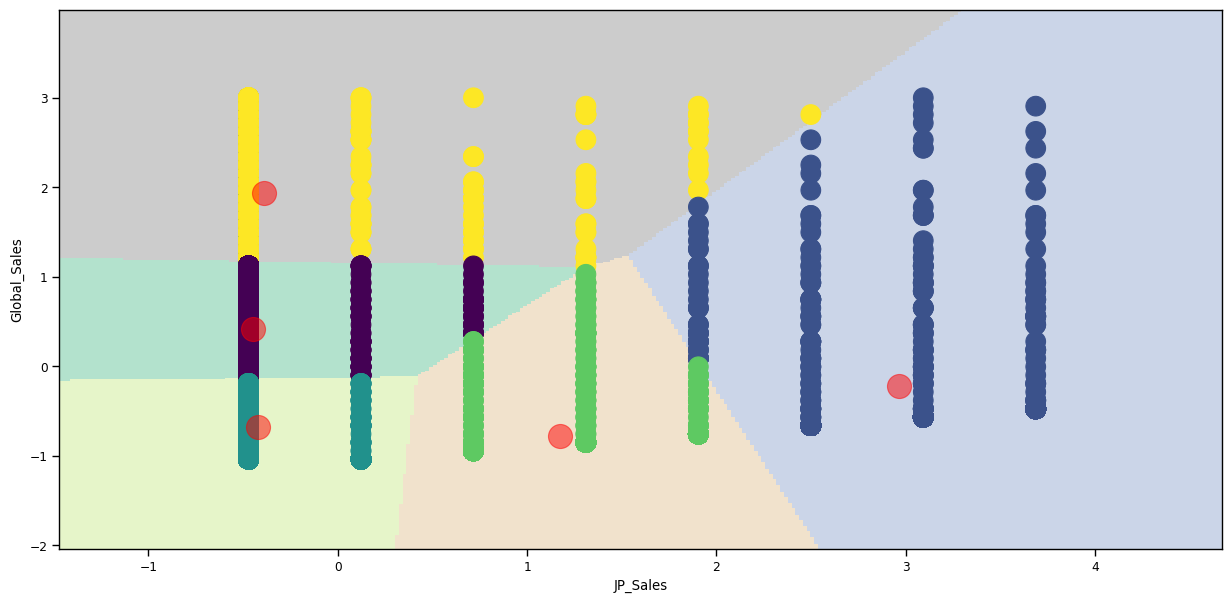

C:\Users\Adik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1418: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


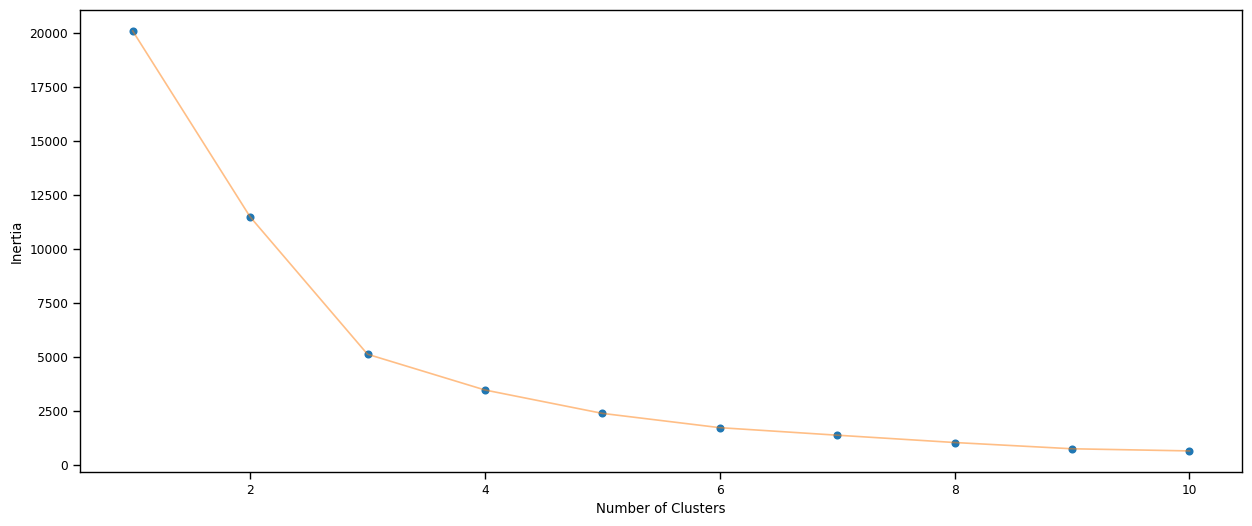

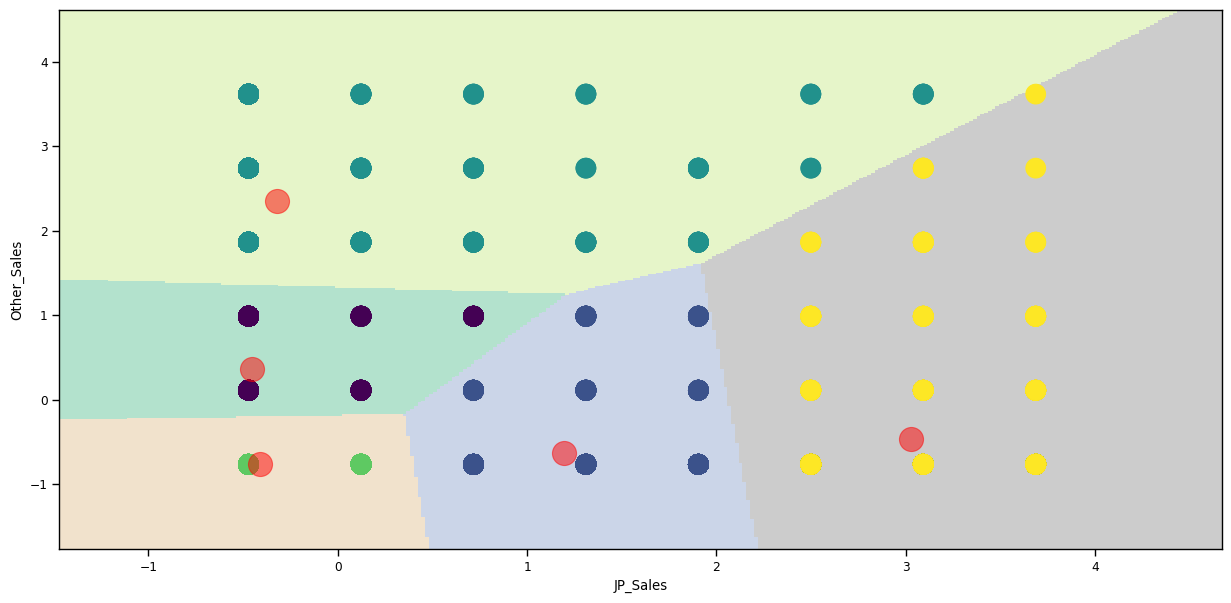

In [33]:
for saleX in ['NA_Sales', 'EU_Sales', 'JP_Sales']:
    for saleY in ['Global_Sales', 'Other_Sales']:
        
        X1 = df_st[[saleX, saleY]].iloc[: , :].values
        inertia = []
        for n in range(1, 11):
            kmeans = KMeans(n_clusters = n, init='k-means++', n_init = 10 ,max_iter=300, tol = 0.001, random_state = 32, algorithm = 'elkan')
            kmeans.fit(X1)
            inertia.append(kmeans.inertia_)
        
        plt.figure(1 , figsize = (15 ,6))
        plt.plot(np.arange(1 , 11) , inertia , 'o')
        plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
        plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
        plt.show()
        
        kmeans = KMeans(n_clusters = 5, init='k-means++', n_init = 10 ,max_iter=300, tol = 0.001, random_state = 32, algorithm = 'elkan')
        kmeans.fit(X1)
        
        h = 0.02
        x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
        y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 
        
        plt.figure(1 , figsize = (15 , 7) )
        plt.clf()
        Z = Z.reshape(xx.shape)
        plt.imshow(Z , interpolation='nearest', 
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
        
        plt.scatter( x = saleX, y = saleY , data = df_st , c = kmeans.labels_ , 
                    s = 200 )
        plt.scatter(x = kmeans.cluster_centers_[: , 0] , y =  kmeans.cluster_centers_[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
        plt.xlabel(saleX)
        plt.ylabel(saleY) 
        plt.show()